# Bayesian PCA Experiments 

In [1]:
import bayespca as bpca
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer,load_wine

np.random.seed(53) # For reproducibility

In [2]:
# Loading data
data = load_iris()
X,y= data['data'],data['target']

In [3]:
print(f"The Data has {X.shape[1]} features")

The Data has 4 features


## PCA And Probabilistic PCA

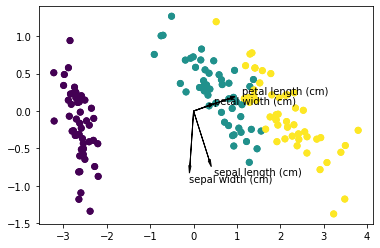

In [4]:
## Original PCA
pca = bpca.PCA(2,method='cov')
Xt = pca.fit_transform(X)

# Plot
plt.scatter(Xt[:,0],Xt[:,1],c=y)

bpca.utils.plot_eigenvec(Xt,pca.eigen_vec,y,data["feature_names"]) # Plot angles of features on the latent space

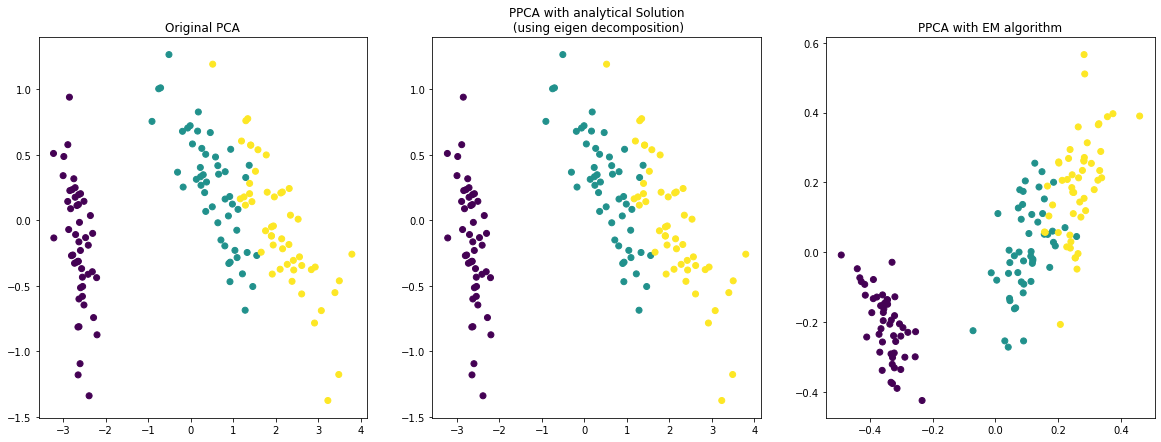

In [5]:
## Probabilistic PCA
ppca = bpca.ProbabilisticPCA(2)
Xpt = pca.fit_transform(X)

ppca_em =  bpca.ProbabilisticPCA(2,method="em")
Xpt_em = ppca_em.fit_transform(X)

# Plot
fig,ax = plt.subplots(1,3,figsize=(20,7))
ax[0].scatter(Xt[:,0],Xt[:,1],c=y)
ax[0].set_title("Original PCA")

ax[1].scatter(Xpt[:,0],Xpt[:,1],c=y)
ax[1].set_title("PPCA with analytical Solution\n (using eigen decomposition)")

ax[2].scatter(Xpt_em[:,0],Xpt_em[:,1],c=y)
ax[2].set_title("PPCA with EM algorithm")

plt.show()

-> same transformation

For EM approx so similar but not exactly the same

## Bayesian PCA

In [12]:
bayes = bpca.BayesianPCA()
Xb = bayes.fit_transform(X)

0
ll =  -1750.3493133705313
1
ll =  -859.3243902762667
2
ll =  -843.3574114673996
3
ll =  -904.5272622796665
4
ll =  -855.4602555450555
5
ll =  -855.4602555450555


### Hinton diagrams

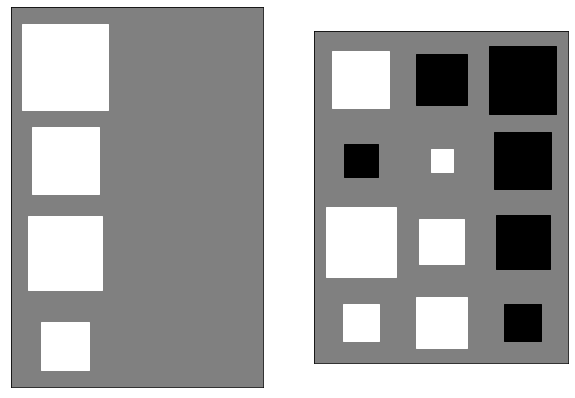

In [13]:
## PPCA with q = d-1
ppca_qmax  = bpca.ProbabilisticPCA(3,method="em")
ppca_qmax.fit(X)

#Plot
fig,ax = plt.subplots(1,2,figsize=(10,7))

bpca.utils.hinton(bayes.W.T,ax=ax[0])
bpca.utils.hinton(ppca_qmax.W.T,ax=ax[1])

-> Shuts off 2 latent space dimensions on the contrary of the probabilistic one which uses fully  the number dimension that was specified.

## Kernel PCA

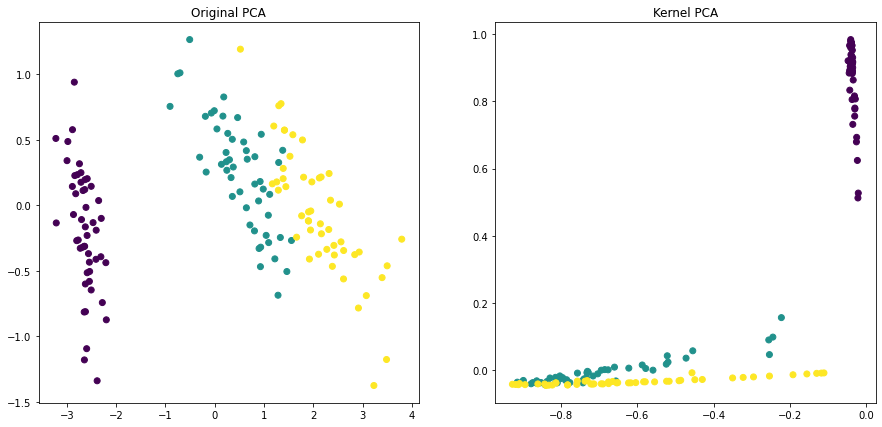

In [8]:
kernel =  bpca.KernelPCA(2)
Xk  = kernel.fit_transform(X)

#Plot
fig,ax = plt.subplots(1,2,figsize=(15,7))

ax[0].scatter(Xt[:,0],Xt[:,1],c=y)
ax[0].set_title("Original PCA")

ax[1].scatter(Xk[:,0],Xk[:,1],c=y)
ax[1].set_title("Kernel PCA")

plt.show()